# More Classification and Clustering Algorithms

In the last lecture we looked at [naive Bayes classifier](http://www.cs.cornell.edu/courses/cs4780/2017sp/lectures/lecturenote05.html). The algorithm is one specific example of what we call *binary classification/clustering problems*.

![binary classification/clustering](images/binary.png)

## Examples of classification/clustering algorithms

1. [k-means](http://stanford.edu/~cpiech/cs221/handouts/kmeans.html): This is a clustering algorithm since it is unsupervised. We can set $k=2$ as well as $k>2$.

2. [k-nn](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4916348/): This is a classification algorithm since it is supervised. Again $k$ could be 2 or more.

3. [Naive Bayes](https://nlp.stanford.edu/IR-book/html/htmledition/naive-bayes-text-classification-1.html): This is again a classification algorithm. This time we can only split into 2 classes.


## Hiearchical clustering

The [hiearchical clustering](https://home.deib.polimi.it/matteucc/Clustering/tutorial_html/hierarchical.html) is an unsupervised partitioning (i.e. a clustering) problem.  Here is the setup: We have a collection of data points and a distance function. 

1. Place each point in a cluster that contain only themselves.
2. Merge two clusters with the smallest distance.
3. Repeat Step 2 until all clusters are merged.

Let us demonstrate this algorithm on one of the datasets we have been using: the [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris):

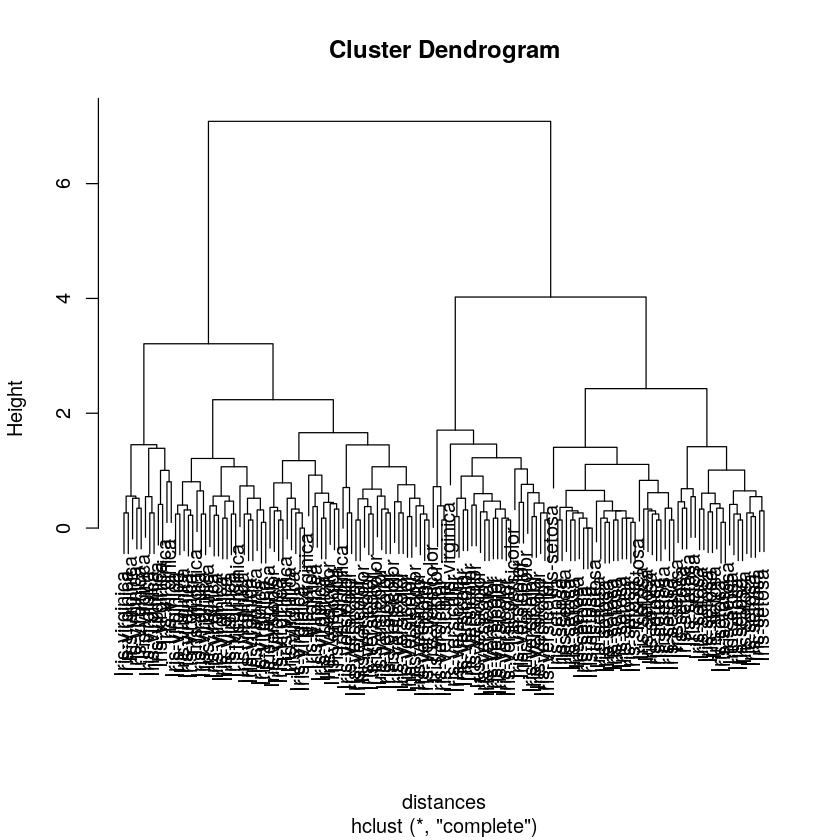

In [1]:
iris <- read.csv("../lecture-5/data/iris.csv",header=FALSE)
distances <- dist(iris[,1:4])
model <- hclust(distances) #,method="ward.D")
plot(model,labels=iris[,5])

In [2]:
predicted <- cutree(model,3)
real <- iris[,5]
table(predicted,real)

         real
predicted Iris-setosa Iris-versicolor Iris-virginica
        1          50               0              0
        2           0              23             49
        3           0              27              1

Here is another example: the [wine dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/):

In [3]:
wine <- read.csv("data/wine.csv",header=FALSE)
model <- hclust(dist(wine[,2:14]),method="ward.D2")
predict <- cutree(model,3)
real <- wine[,1]
table(predict,real)

       real
predict  1  2  3
      1 46  2  0
      2 13 18 27
      3  0 51 21

In [4]:
head(wine)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


As you can see, the columns are unbalanced. Some of the features are large while others are small.  We need to normalize:

In [5]:
normalize <- function(x) {
    a <- min(x)
    b <- max(x)
    return((x-a)/(b-a))
}

wineNormalized <- as.data.frame(lapply(wine[,2:14],normalize))
model <- hclust(dist(wineNormalized),method="ward.D")
predicted <- cutree(model,3)
table(predicted,real)

         real
predicted  1  2  3
        1 57  0  0
        2  2 67  0
        3  0  4 48

## Logistic regression

[Logistic regression](https://stats.idre.ucla.edu/r/dae/logit-regression/) is a supervised partition (i.e. a classification) problem.  We have a collection of data points $x^{(1)},\ldots,x^{(n)}$ where each $x^{(i)}$ is a vector in a fixed vector space $\mathbb{R}^m$.  We also have two labels $y^{(i)}= \pm 1$.  Our task is to construct a model.

### Postulate: 

Split the space $\mathbb{R}^m$ into two halves using a hyper-plane. The deeper the point into one of these halves, the greater the probability that the point belongs to this half.

If the hyper-plane is given by a (unit) normal vector $\mathbf{n}$ and displacement $\mathbf{b}$, then for any point $\mathbf{x}\in\mathbb{R}^m$ the sign of the dot product $\mathbf{n}\cdot (\mathbf{x} - \mathbf{b})$ is the same within each half.

### The logistic function

Consider the function $f(x) = \frac{1}{1+e^{-x}}$ whose graph is given below:

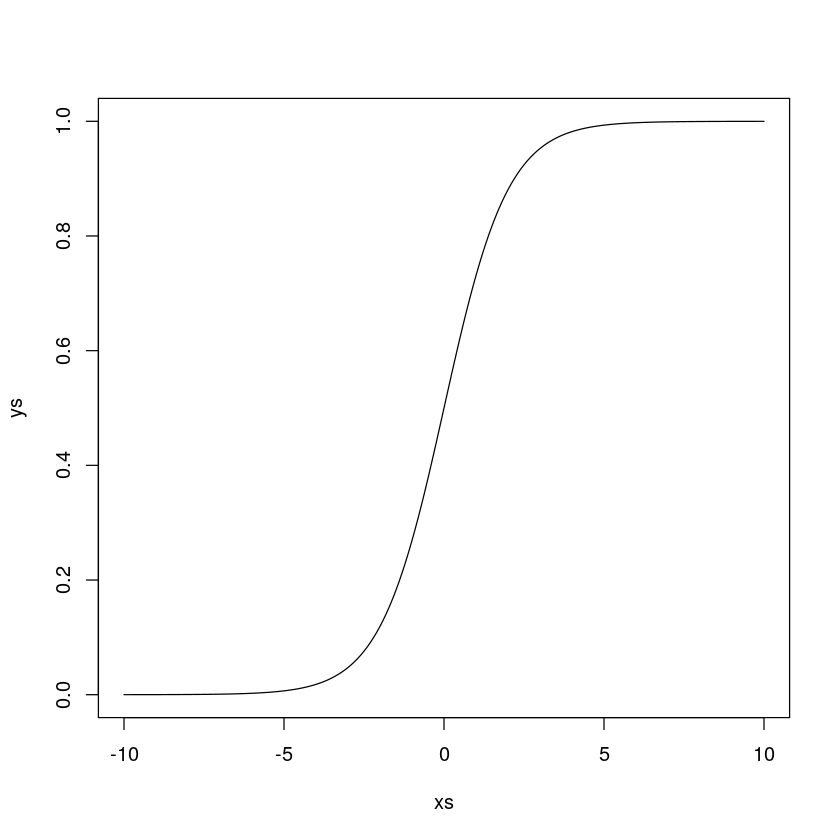

In [6]:
logit <- function(x) { return(1/(1+exp(-x))) }

xs <- seq(-10,10,0.1)
ys <- logit(xs)
plot(xs,ys,type="l")

So, we can use $logit(\mathbf{n}\cdot(\mathbf{x} - \mathbf{b}))$ as a *proxy* for the probability that $\mathbf{x}$ belongs to the positive half.

$$ cost(\mathbf{n},\mathbf{b}) = \prod_i (1-logit(\mathbf{n}\cdot(x^{(i)} - \mathbf{b}))^{1-y^{(i)}} (logit(\mathbf{n}\cdot(x^{(i)} - \mathbf{b}))^{y^{(i)}} $$

Let us show how this works on an example:

In [7]:
iris <- read.csv("../lecture-5/data/iris.csv", head=FALSE)
head(iris)

setosa <- ifelse(iris[,5]=="Iris-setosa",1,0)
virginica <- ifelse(iris[,5]=="Iris-virginica",1,0)
versicolor <- ifelse(iris[,5]=="Iris-versicolor",1,0)

newdata <- cbind(iris[,1:4],virginica,versicolor,setosa)
head(newdata)

train <- sample(1:150, 100)
test <- -train

V1,V2,V3,V4,V5
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


V1,V2,V3,V4,virginica,versicolor,setosa
5.1,3.5,1.4,0.2,0,0,1
4.9,3.0,1.4,0.2,0,0,1
4.7,3.2,1.3,0.2,0,0,1
4.6,3.1,1.5,0.2,0,0,1
5.0,3.6,1.4,0.2,0,0,1
5.4,3.9,1.7,0.4,0,0,1


In [14]:
library(caret)
library(e1071)

In [28]:
model <- glm(versicolor ~ V1 + V2 + V3 + V4, data = newdata[train,], family="binomial")
oddsratio <- exp(predict(model,newdata[test,]))
predicted <- ifelse(oddsratio > 0.7,1,0)
confusionMatrix(table(predicted,real=newdata[test,"versicolor"]))

Confusion Matrix and Statistics

         real
predicted  0  1
        0 30  8
        1  3  9
                                          
               Accuracy : 0.78            
                 95% CI : (0.6404, 0.8847)
    No Information Rate : 0.66            
    P-Value [Acc > NIR] : 0.04675         
                                          
                  Kappa : 0.4722          
 Mcnemar's Test P-Value : 0.22780         
                                          
            Sensitivity : 0.9091          
            Specificity : 0.5294          
         Pos Pred Value : 0.7895          
         Neg Pred Value : 0.7500          
             Prevalence : 0.6600          
         Detection Rate : 0.6000          
   Detection Prevalence : 0.7600          
      Balanced Accuracy : 0.7193          
                                          
       'Positive' Class : 0               
                                          

In [26]:
model <- glm(virginica ~ V1 + V2 + V3 + V4, data = newdata[train,], family="binomial")
oddsratio <- exp(predict(model,newdata[test,]))
predicted <- ifelse(oddratio > 1.0,1,0)
confusionMatrix(table(predicted,real=newdata[test,"virginica"]))

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Confusion Matrix and Statistics

         real
predicted  0  1
        0 27 13
        1  7  3
                                          
               Accuracy : 0.6             
                 95% CI : (0.4518, 0.7359)
    No Information Rate : 0.68            
    P-Value [Acc > NIR] : 0.9118          
                                          
                  Kappa : -0.0204         
 Mcnemar's Test P-Value : 0.2636          
                                          
            Sensitivity : 0.7941          
            Specificity : 0.1875          
         Pos Pred Value : 0.6750          
         Neg Pred Value : 0.3000          
             Prevalence : 0.6800          
         Detection Rate : 0.5400          
   Detection Prevalence : 0.8000          
      Balanced Accuracy : 0.4908          
                                          
       'Positive' Class : 0               
                                          

In [18]:
model <- glm(setosa ~ V1 + V2 + V3 + V4, data = newdata[train,], family="binomial")
oddsratio <- exp(predict(model,newdata[test,]))
predicted <- ifelse(oddsratio > 1.0,1,0)
confusionMatrix(table(predicted,real=newdata[test,"setosa"]))

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Confusion Matrix and Statistics

         real
predicted  0  1
        0 33  0
        1  0 17
                                     
               Accuracy : 1          
                 95% CI : (0.9289, 1)
    No Information Rate : 0.66       
    P-Value [Acc > NIR] : 9.488e-10  
                                     
                  Kappa : 1          
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.00       
            Specificity : 1.00       
         Pos Pred Value : 1.00       
         Neg Pred Value : 1.00       
             Prevalence : 0.66       
         Detection Rate : 0.66       
   Detection Prevalence : 0.66       
      Balanced Accuracy : 1.00       
                                     
       'Positive' Class : 0          
                                     